### An HR company has hired you as a ML engineer, your role is to create a model that can predict the salary of the employee based on his/her years of experience

In [1]:
import numpy as np
import pandas as pd

In [2]:
#1. Load the data
salaryData = pd.read_csv('Salary_Data.csv')
salaryData

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
salaryData.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [4]:
#2.Check for Missing values
salaryData.info()
# If there exists a data point where label is missing, simply delete that record.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
salaryData.dropna(inplace=True)

In [6]:
salaryData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 720.0 bytes


In [7]:
#Seperate your data as feature and Label
#Rule for Regression which is expected from SKLEARN:
# 1. Data must be complete
# 2. Data must be numeric
# 3. Both features and label numpy array must hold 2 dimensions(2d array)
features = salaryData.iloc[:,[0]].values
label = salaryData.iloc[:,[1]].values
features
label

array([[ 39343.],
       [ 46205.],
       [ 37731.],
       [ 43525.],
       [ 39891.],
       [ 56642.],
       [ 60150.],
       [ 54445.],
       [ 64445.],
       [ 57189.],
       [ 63218.],
       [ 55794.],
       [ 56957.],
       [ 57081.],
       [ 61111.],
       [ 67938.],
       [ 66029.],
       [ 83088.],
       [ 81363.],
       [ 93940.],
       [ 91738.],
       [ 98273.],
       [101302.],
       [113812.],
       [109431.],
       [105582.],
       [116969.],
       [112635.],
       [122391.],
       [121872.]])

In [8]:
#No need to perform Missing data analysis
#No need for categorical data handling
#No need for Ordinal data handling
#Feature Scaling --- Optional---  I opt not do to it !!!

In [9]:
# Create Training and Testing set for Model Creation
# Training Dataset is used to train your model 
# Testing Dataset is used to test the quality of the model.(quality of the prediction)
# 80% --- Training data 20% --- testing data
# Ratios are decided by Data Scientist 
# 80:20, 70:30, 75:25, 65:35
# Ratio is ideally decided based on the size of the data ( number of datapoints )

In [10]:
# How to get the best model using a simple Looping trick?
# BruteForce technique
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
for i in range(1,31):
    
    X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size = 0.2,
                                                random_state= i)
    salaryPrediction = LinearRegression()
    salaryPrediction.fit(X_train,y_train)
    train_score= salaryPrediction.score(X_train,y_train)
    test_score = salaryPrediction.score(X_test,y_test)
    
    if test_score > train_score:
        print("Training Score {} Testing Score {} Random State {}"
              .format(train_score,test_score,i))

Training Score 0.9545249190394052 Testing Score 0.9695039421049821 Random State 3
Training Score 0.9528197369259258 Testing Score 0.9631182154839475 Random State 8
Training Score 0.9494673013344644 Testing Score 0.9816423482070255 Random State 10
Training Score 0.9527636176933665 Testing Score 0.9606215790278543 Random State 14
Training Score 0.9460054870434312 Testing Score 0.9835849730044817 Random State 26
Training Score 0.9527636606684406 Testing Score 0.9636425773684422 Random State 27
Training Score 0.9400496694274888 Testing Score 0.9944092048209744 Random State 30


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size = 0.2,
                                                random_state= 30)

In [12]:
#Create the model
from sklearn.linear_model import LinearRegression
salaryPrediction = LinearRegression()
salaryPrediction.fit(X_train,y_train)
#Fit is all about calculating the slope and intercept of the equation

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
#Check for the Quality of The model
# 1. Check whether the model is a generalized model or not
#    To ensure the model is generalized the test score must be greater than the train score.
# 2. Are you satisfied with Accuracy score of the model.

In [14]:
# 1. Check whether the model is a generalized model or not
salaryPrediction.score(X_train,y_train) #Known data

0.9400496694274888

In [15]:
salaryPrediction.score(X_test,y_test) #Unknown data

0.9944092048209744

In [16]:
#Equation of line
# salary = b0 + b1 (YearsExperience)
print(salaryPrediction.intercept_)
print(salaryPrediction.coef_)
print("Equation of Line is Salary = {} + {} * (YearsExperience)"
      .format(salaryPrediction.intercept_, salaryPrediction.coef_))

[25566.43561641]
[[9481.03756369]]
Equation of Line is Salary = [25566.43561641] + [[9481.03756369]] * (YearsExperience)


In [19]:
# Deployment Phase
yearsExperience = float(input("Enter Years of Experience: "))
salary = salaryPrediction.predict(np.array([[yearsExperience]]))
print("Predicted salary for {} years of experience is {}"
      .format(yearsExperience,salary))

Enter Years of Experience: 11
Predicted salary for 11.0 years of experience is [[129857.84881697]]


In [18]:
#Deploy model as a file --- Persist your model
import pickle # Allows you to persist your memory object as a file
pickle.dump(salaryPrediction , open('HRSalaryPredictor.model', 'wb') )

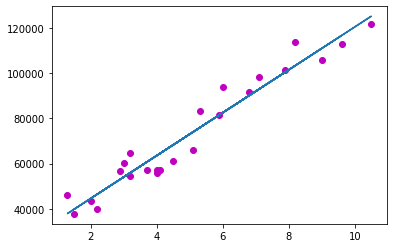

In [48]:
plt.scatter(X_train,y_train, color = "m", marker = "o")
plt.plot(X_train,salaryPrediction.predict(X_train))